## Imported Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
pd.set_option("display.max_rows", 200)

## Read CSV File

In [3]:
df = pd.read_csv("FIES PUF 2012 Vol.1.CSV")
df

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2,25,2,21100,415052,138.25,200.6576,3.0,...,01,01,,,0.946172,108417.00,9,8,8,9
1,14,101001000,3,43,2,21100,415052,138.25,200.6576,12.5,...,,01,,01,0.946172,30631.60,5,9,9,4
2,14,101001000,4,62,2,21100,415052,138.25,200.6576,2.0,...,,01,,,0.946172,86992.50,9,6,6,8
3,14,101001000,5,79,2,21100,415052,138.25,200.6576,4.0,...,,01,,,0.946172,43325.75,6,6,6,6
4,14,101001000,10,165,2,21100,415052,138.25,200.6576,5.0,...,,,,01,0.946172,37481.80,6,6,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40166,12,9804029001,18,568,1,22000,114062,271.25,963.2264,5.0,...,00,00,00,00,0.902863,30101.60,5,5,7,7
40167,12,9804035000,1,25,2,22000,414067,271.25,588.6253,9.0,...,00,01,00,00,0.902863,14368.89,1,5,7,3
40168,12,9804035000,2,51,2,22000,414067,271.25,588.6253,6.0,...,00,00,00,00,0.902863,19137.33,3,4,6,4
40169,12,9804035000,3,75,2,22000,414067,271.25,588.6253,5.0,...,00,01,00,00,0.902863,30985.00,5,6,7,7


## Data Cleaning
* W_REGN
* NONAGRI_SAL
* EMPLOYED_PAY
* OCCUP
* JOB




In [4]:
# Get only people who have jobs
selected_df = df[["W_REGN","W_OID","W_SHSN","W_HCN","NONAGRI_SAL","EMPLOYED_PAY","OCCUP","JOB","SEX"]]

In [5]:
selected_df = selected_df.drop_duplicates()

In [6]:
selected_df = selected_df.dropna(subset=["OCCUP"])

In [7]:
selected_df = selected_df[selected_df["JOB"] != 2]

In [8]:
selected_df = selected_df[selected_df["NONAGRI_SAL"] > 0]


In [9]:
selected_df.loc[:, "EMPLOYED_PAY"] = pd.to_numeric(selected_df["EMPLOYED_PAY"], errors='coerce')
selected_df.loc[:, "EMPLOYED_PAY"] = selected_df["EMPLOYED_PAY"].fillna(0).astype(int)
employed_df = selected_df[["EMPLOYED_PAY"]]

C:\Users\Joshua\AppData\Local\Temp\ipykernel_10872\1621606931.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  selected_df.loc[:, "EMPLOYED_PAY"] = selected_df["EMPLOYED_PAY"].fillna(0).astype(int)


In [10]:
selected_df = selected_df[selected_df["EMPLOYED_PAY"] == 1]

In [11]:
# Remove the Farmers, Forestry Worker,Fishermen since they are counted as agricultural workers but they they are not categorized
#  
selected_df = selected_df[selected_df['OCCUP'] != "6111"]

In [12]:
clean_df = selected_df
# clean_df
selected_df

,W_REGN,W_OID,W_SHSN,W_HCN,NONAGRI_SAL,EMPLOYED_PAY,OCCUP,JOB,SEX
4,14,101001000,10,165,32000,1,5220,1,1
27,14,101030001,1,1,63246,1,1130,1,1
33,14,101030001,12,191,293556,1,2331,1,2
34,14,101030001,14,222,33000,1,1316,1,1
41,14,101031000,4,61,98300,1,7231,1,1
...,...,...,...,...,...,...,...,...,...
40160,12,9804029001,7,213,72000,1,9132,1,1
40164,12,9804029001,15,8005,54300,1,1314,1,1
40165,12,9804029001,17,537,58100,1,8321,1,1
40167,12,9804035000,1,25,50400,1,8321,1,1


## EDA Questions

* How does the average salary of the top job type in each region compare to the region's overall average salary?
* Which Region has the highest overall average salary for non-agricultural jobs?
* What occupation has the most employed in the dataset across all regions
* Is there a notable difference in the salary distribution by gender for sole earners in non-agricultural roles?
* Are there significant regional differences in the salary distribution for similar occupations among sole earners?


Q1: How does the average salary of the top job type in each region compare to the region's overall average salary?

In [13]:
# Calculate the average salary for each job type by region
avg_salary_by_job = selected_df.groupby(['W_REGN', 'OCCUP'])['NONAGRI_SAL'].mean().reset_index()

In [14]:
# Get the top job type for each region based on average salary
top_job_by_region = avg_salary_by_job.loc[avg_salary_by_job.groupby('W_REGN')['NONAGRI_SAL'].idxmax()]

In [15]:
# Calculate the overall average salary for each region
overall_avg_salary = selected_df.groupby('W_REGN')['NONAGRI_SAL'].mean().reset_index()
overall_avg_salary.columns = ['W_REGN', 'Overall_Avg_Salary']

In [16]:
# Merge the top job salary and overall average salary
comparison_df = pd.merge(top_job_by_region, overall_avg_salary, on='W_REGN', how='inner')

In [17]:
# Rename the columns for clarity
comparison_df.columns = ['W_REGN', 'Top_Occupation', 'Top_Avg_Salary', 'Overall_Avg_Salary']

In [18]:
# Display the resulting DataFrame
comparison_df

,W_REGN,Top_Occupation,Top_Avg_Salary,Overall_Avg_Salary
0,1,2152,1019606.0,83266.892694
1,2,1412,518500.0,101307.356902
2,3,3450,719536.0,110484.808568
3,5,1110,574575.0,68173.927798
4,6,1226,872000.0,85413.229617
5,7,6113,418800.0,84079.386623
6,8,1430,627600.0,69454.105634
7,9,1411,595200.0,81571.986577
8,10,2152,1094600.0,93837.728889
9,11,1429,1200410.0,95818.950820


## Numerical Summaries

In [19]:
# Calculate numerical summaries for Top Average Salary
top_avg_salary_mean = comparison_df['Top_Avg_Salary'].mean()
top_avg_salary_median = comparison_df['Top_Avg_Salary'].median()
top_avg_salary_std = comparison_df['Top_Avg_Salary'].std()
top_avg_salary_range = comparison_df['Top_Avg_Salary'].max() - comparison_df['Top_Avg_Salary'].min()

# Calculate numerical summaries for Overall Average Salary
overall_avg_salary_mean = comparison_df['Overall_Avg_Salary'].mean()
overall_avg_salary_median = comparison_df['Overall_Avg_Salary'].median()
overall_avg_salary_std = comparison_df['Overall_Avg_Salary'].std()
overall_avg_salary_range = comparison_df['Overall_Avg_Salary'].max() - comparison_df['Overall_Avg_Salary'].min()

# Displaying the numerical summaries
print("Numerical Summaries for Top Average Salary:")
print(f"  Mean: {top_avg_salary_mean:.2f}")
print(f"  Median: {top_avg_salary_median:.2f}")
print(f"  Standard Deviation: {top_avg_salary_std:.2f}")
print(f"  Range: {top_avg_salary_range:.2f}")

print("\nNumerical Summaries for Overall Average Salary:")
print(f"  Mean: {overall_avg_salary_mean:.2f}")
print(f"  Median: {overall_avg_salary_median:.2f}")
print(f"  Standard Deviation: {overall_avg_salary_std:.2f}")
print(f"  Range: {overall_avg_salary_range:.2f}")


Numerical Summaries for Top Average Salary:
  Mean: 828687.47
  Median: 719536.00
  Standard Deviation: 417045.04
  Range: 1625312.00

Numerical Summaries for Overall Average Salary:
  Mean: 94167.16
  Median: 85413.23
  Standard Deviation: 22960.56
  Range: 91543.74


## Findings from Numerical Summaries

### Top Average Salary
The following are the numerical summaries for the top average salary across different occupations by region:

- **Mean**: 828,687.47
- **Median**: 719,536.00
- **Standard Deviation**: 417,045.04
- **Range**: 1,625,312.00

The analysis of the top average salary of non-agricultural jobs across different occupations by region reveals a mean salary of 828,687.47, with a median of 719,536.00, indicating a right-skewed distribution. The standard deviation of 417,045.04 suggests considerable variability in salaries, while the range of 1,625,312.00 highlights significant disparities in earnings across occupations.

### Overall Average Salary
The following are the numerical summaries for the overall average salary by region:

- **Mean**: 94,167.16
- **Median**: 85,413.23
- **Standard Deviation**: 22,960.56
- **Range**: 91,543.74

In contrast, the overall average salary by region has a much lower mean of 94,167.16 and a median of 85,413.23, reflecting the more common income levels. The standard deviation of 22,960.56 indicates less variability compared to the top average salaries, and the range of 91,543.74 suggests a narrower disparity in overall salaries.

## Visualization

In [20]:
# Data for Top Average Salary of Non-Agricultural Jobs
top_avg_salary = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Standard Deviation', 'Range'],
    'Value': [top_avg_salary_mean, top_avg_salary_median, top_avg_salary_std, top_avg_salary_range]
})

# Data for Overall Average Salary by Region
overall_avg_salary = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Standard Deviation', 'Range'],
    'Value': [overall_avg_salary_mean, overall_avg_salary_median, overall_avg_salary_std, overall_avg_salary_range]
})

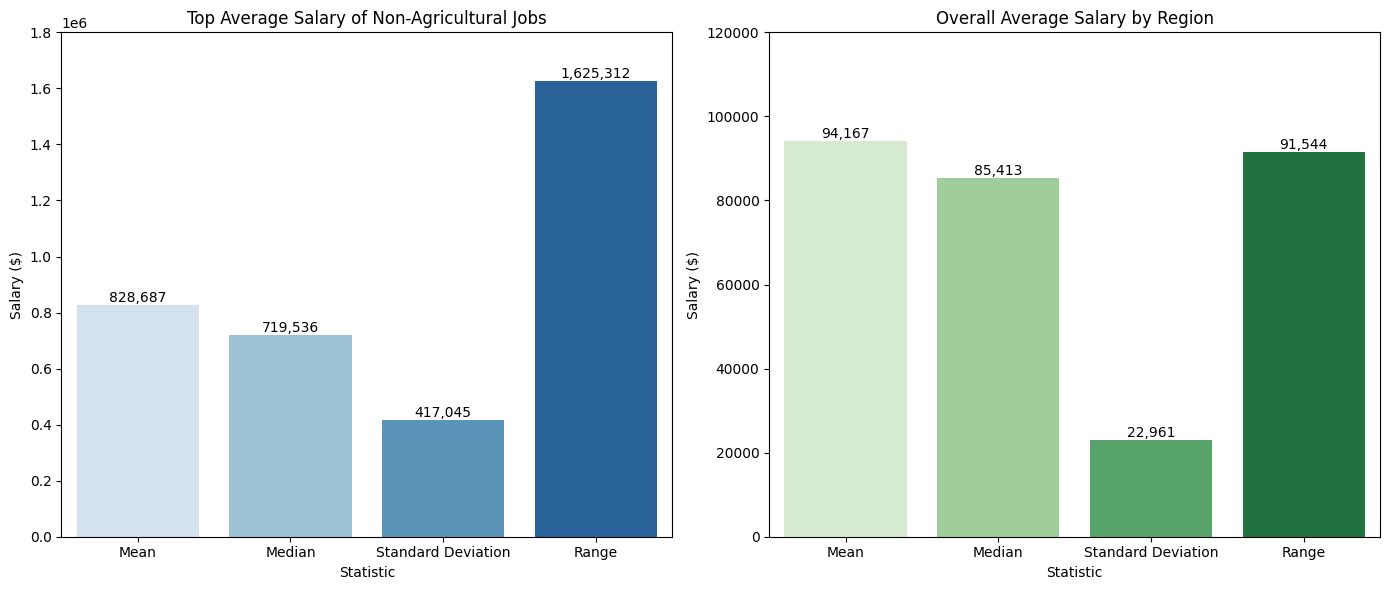

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Visualization for Top Average Salary
sns.barplot(x='Statistic', y='Value', hue='Statistic', data=top_avg_salary, ax=ax[0], palette='Blues', dodge=False, legend=False)
ax[0].set_title('Top Average Salary of Non-Agricultural Jobs')
ax[0].set_ylabel('Salary ($)')
ax[0].set_ylim(0, 1800000)
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)

sns.barplot(x='Statistic', y='Value', hue='Statistic', data=overall_avg_salary, ax=ax[1], palette='Greens', dodge=False, legend=False)
ax[1].set_title('Overall Average Salary by Region')
ax[1].set_ylabel('Salary ($)')
ax[1].set_ylim(0, 120000)
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


## Findings from Visualization

### Top Average Salary
From the first bar chart, we can observe that:

- **Mean Salary** is significantly higher than the median, indicating that there are high-paying jobs that raise the overall average.

- **Standard Deviation** is substantial, suggesting a wide variation in salaries, which implies that certain jobs within the top-paying category have extremely high earnings compared to others.
Range shows the difference between the highest and lowest top average salaries, highlighting a broad spectrum of earning potentials within this category.

- **Range** shows the difference between the highest and lowest top average salaries, highlighting a broad spectrum of earning potentials within this category.

### Overall Average Salary
From the second bar char, we can observe that:

- **Mean and Median Salaries** are relatively close, suggesting a more consistent distribution of salaries across regions.

- **Lower Standard Deviation** indicates that there is less variation in salaries, meaning that most regions have average salaries clustered around the mean.

- **Range** is narrower compared to the top average salaries, which reflects less disparity between the highest and lowest overall average salaries across different regions.

Q2: Which Region has the highest overall average salary for non-agricultural jobs?

In [22]:
grouped_regions = clean_df.groupby(["W_REGN"])
grouped_regions = grouped_regions.agg({"NONAGRI_SAL" : "median"})
grouped_regions

,NONAGRI_SAL
W_REGN,
1,58605.0
2,67560.0
3,93980.0
5,40125.0
6,52740.0
7,66120.0
8,34250.0
9,54066.0
10,62100.0


In [23]:
highest_mean_salary = grouped_regions["NONAGRI_SAL"].max()
highest_region = grouped_regions["NONAGRI_SAL"].idxmax()
print(f"Region {highest_region} has the highest mean non-agricultural salary: ", "{:.2f}".format(highest_mean_salary))

Region 13 has the highest mean non-agricultural salary:  137076.00


## Visualization

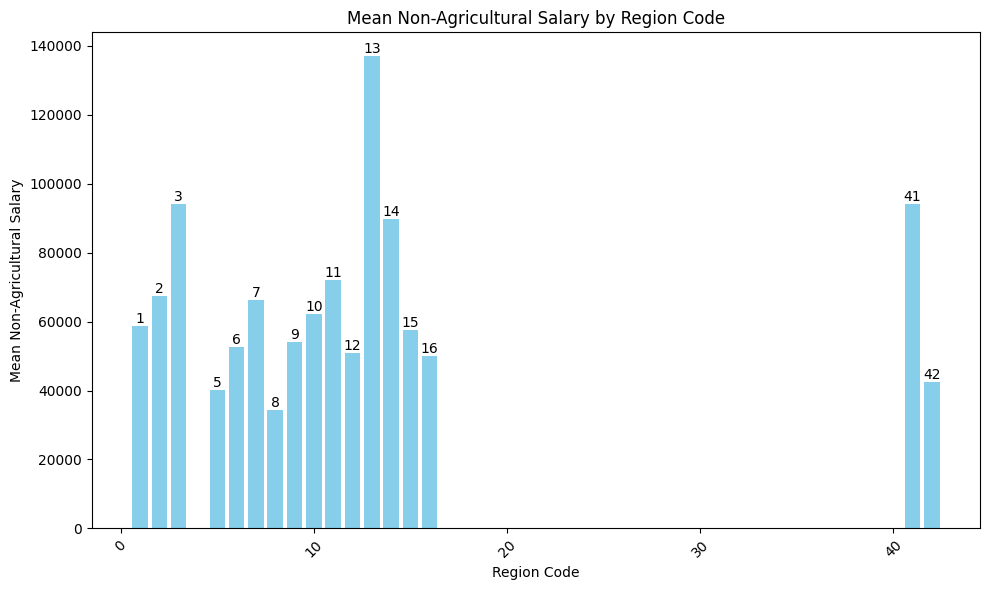

In [24]:
#Visualization
region_salaries = {
    1: 58605.0, 2: 67560.0, 3: 93980.0, 5: 40125.0, 6: 52740.0,
    7: 66120.0, 8: 34250.0, 9: 54066.0, 10: 62100.0, 11: 72036.0,
    12: 50780.0, 13: 137076.0, 14: 89880.0, 15: 57600.0, 16: 49900.0,
    41: 94150.0, 42: 42600.0
}

grouped_regions = pd.DataFrame(list(region_salaries.items()), columns=["W_REGN", "NONAGRI_SAL"])

plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_regions["W_REGN"], grouped_regions["NONAGRI_SAL"], color='skyblue')

plt.xlabel('Region Code')
plt.ylabel('Mean Non-Agricultural Salary')
plt.title('Mean Non-Agricultural Salary by Region Code')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             f'{grouped_regions["W_REGN"][i]}', ha='center', va='bottom')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Q3: What occupation has the most employed in the dataset across all regions


In [25]:
# MALI code sa QUESTION 3 ayusin later
grouped_occupations = clean_df[["OCCUP"]]
grouped_occupations

,OCCUP
4,5220
27,1130
33,2331
34,1316
41,7231
...,...
40160,9132
40164,1314
40165,8321
40167,8321


In [26]:
# Get the most common occup
most_common_occup = grouped_occupations["OCCUP"].value_counts().idxmax()
print(most_common_occup)

1314


In [27]:
most_common_count = grouped_occupations["OCCUP"].value_counts().max()
print(most_common_count)

500


In [28]:
print(f"ID of the most common occupation = {most_common_occup} with count {most_common_count}")

ID of the most common occupation = 1314 with count 500


Q4: Is there a notable difference in the salary distribution by gender for sole earners in non-agricultural roles?
* H0: THe distribution of the two groups are equal (two groups have the same median)
* HA: THe distribution fo the two groups are not equal (two groups' median differ)

In [30]:
grouped_sex = clean_df.groupby(["SEX"])
aggregated_group_sex = grouped_sex.agg({"NONAGRI_SAL" : ["median", "count"]})
aggregated_group_sex

NONAGRI_SAL      
         median count
SEX                  
1       74880.0  7843
2       61025.0  1564

In [31]:
sex_groups_only = clean_df.drop(columns=["W_REGN", "W_OID","W_SHSN","W_HCN","EMPLOYED_PAY", "OCCUP","JOB"])

In [32]:
# Get Male and Female in separate dataframe


male_group = sex_groups_only[sex_groups_only["SEX"] == 1]
female_group = sex_groups_only[sex_groups_only["SEX"] == 2]

# male_group
# female_group

Mann-Whitney U distribution used to find median ranks of two groups that assumes that there's no normality and variance are not equal. since may outliers sa data we can use this 

In [33]:
u_test, p_value = mannwhitneyu(male_group["NONAGRI_SAL"],female_group["NONAGRI_SAL"])
print(u_test)
print(p_value)

6437166.5
0.001939435522249505


In [34]:
alpha1 = 0.05
if (p_value < alpha1).all():
    print("Reject Null Hypothesis, There is significant difference between groups")
else:
    print("Fail to reject the null hypothesis, There is no significant difference between groups")

Reject Null Hypothesis, There is significant difference between groups


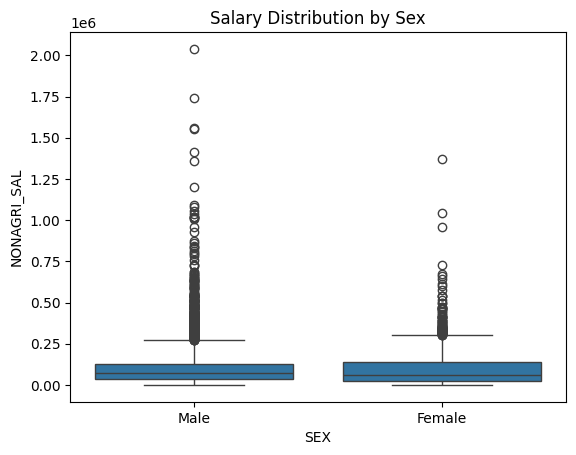

In [35]:
combined_salaries = pd.concat([male_group[['NONAGRI_SAL', 'SEX']], female_group[['NONAGRI_SAL', 'SEX']]])

sns.boxplot(x='SEX', y='NONAGRI_SAL', data=combined_salaries)

# Customize the plot
plt.title("Salary Distribution by Sex")
plt.xticks([0, 1], ['Male', 'Female'])  
plt.show()


# print(male_group.columns)
# print(female_group.columns)

We conclude that there is a significant difference in salary between male and females in non-agricultural sole earners. However, this difference may not be in the median salaries, but rather in the range of the salary distributions between two groups. The median may look close, but the test suggest that factors like the range of salaries, the outliers, and the overall shape of the distribution contribute to the difference

## Research Question
__1.Can we cluster __